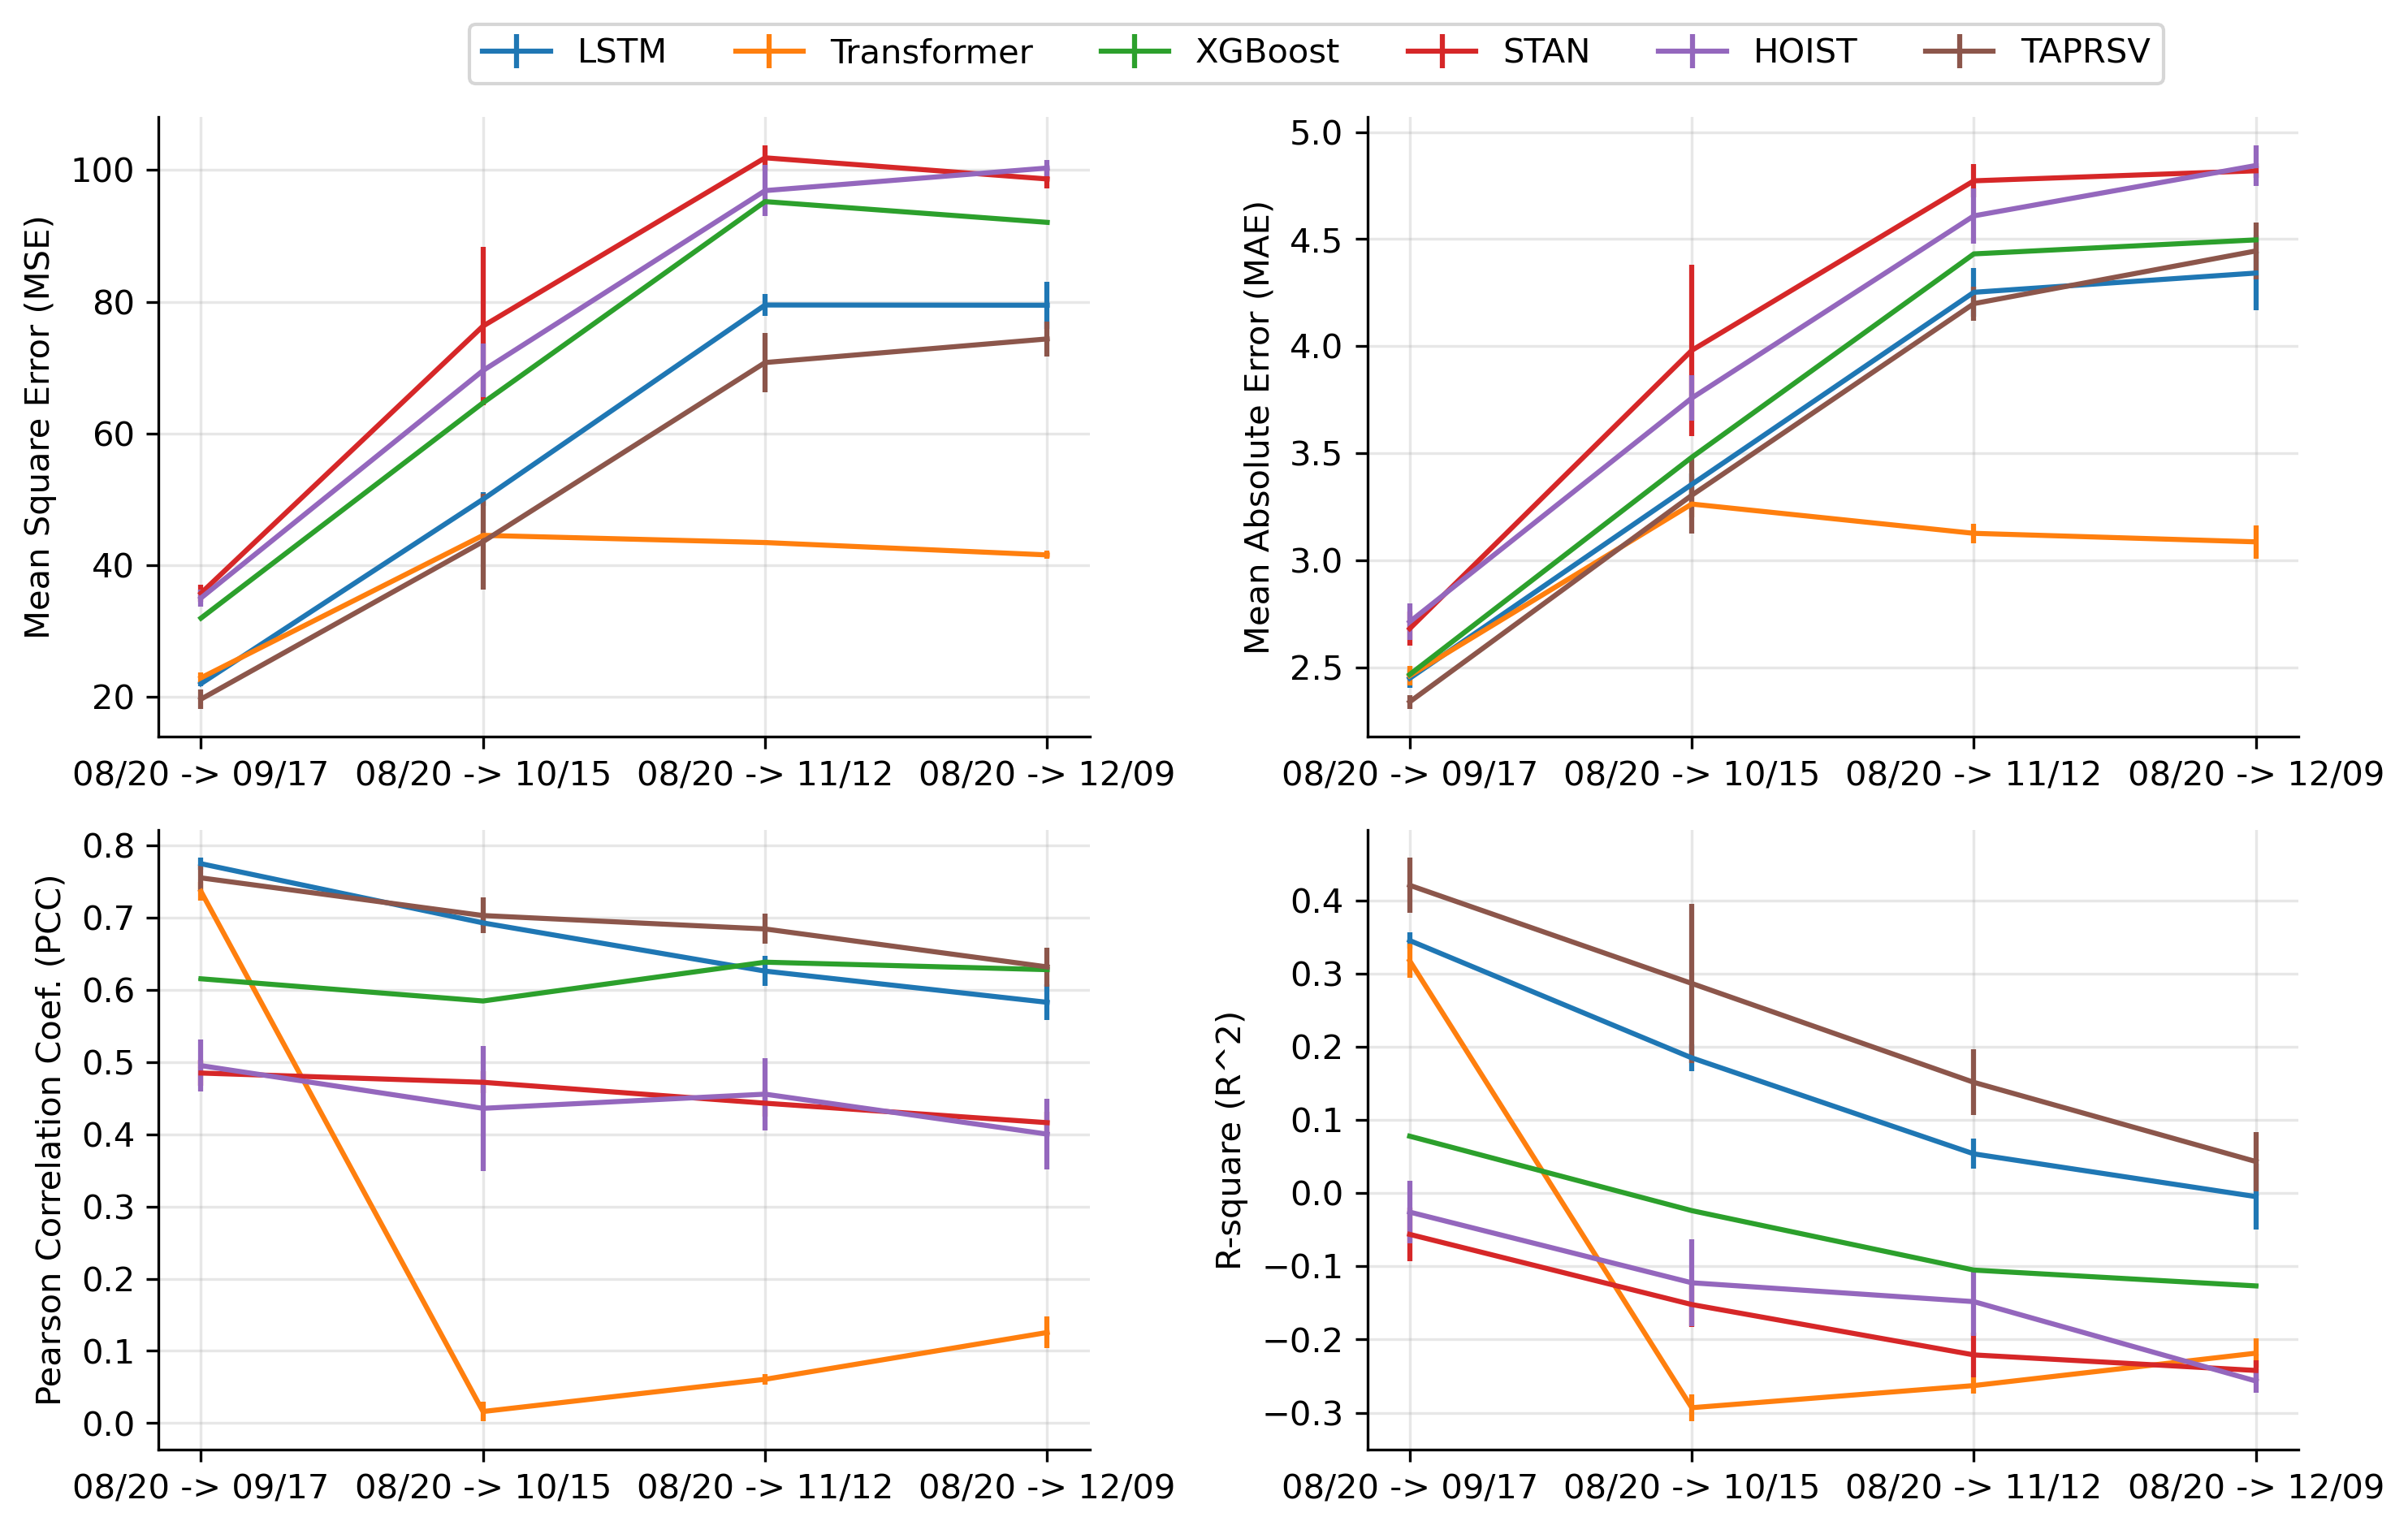

In [51]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

root = "D:\OneDrive - University of Edinburgh\paper\Spatio-temporal RSV\TAP-RSV 2\RSV\logs\\results-exp2\\"
files = ["lstm", "transformer", "xgboost", "stan", "hoist", "taprsv"]
model_names = ["LSTM", 'Transformer', "XGBoost", "STAN", "HOIST", "TAPRSV"]
metric_names = ["Mean Square Error (MSE)", "Mean Absolute Error (MAE)", \
                "Pearson Correlation Coef. (PCC)", "R-square (R^2)"]
# store the results of one model in to model = []
# > model = [dict1, dict2, ...]
# > models = [model1, model2, ...]

# load all dicts
models = []
for file_name in files:
    file_path = os.path.join(root, file_name + ".log")
    models.append([json.loads(item[:-1].replace("'", '"')) for item in open(file_path, "r").readlines()[::2]])

    
fig = plt.figure(figsize=(10, 6), dpi=300)
# compute window by window
for idx, m in enumerate(["mse", "mae", "pcc", "rsquare"]):
    mean_curves = [[] for _ in files]
    std_curves = [[] for _ in files]
    for idx2, model in enumerate(models):
        for w in range(4):
            metric = []
            for item in model[w*5: w*5+5]:
                if m in item:
                    metric.append(item[m])
                else:
                    metric.append(item[f"test_{m}_loss"])
            mean_curves[idx2].append(np.mean(metric))
            std_curves[idx2].append(np.std(metric))
    
    mean_curves = np.array(mean_curves)
    std_curves = np.array(std_curves)
    
    ax = plt.subplot(2, 2, idx+1)
    for idx2, name in enumerate(model_names):
        ax.errorbar(np.arange(4), mean_curves[idx2], yerr=std_curves[idx2], label=name)
#         plt.plot(mean_curves[idx2], label=name)
#         plt.fill_between(np.arange(4), mean_curves[idx2] - std_curves[idx2], \
#                          mean_curves[idx2] + std_curves[idx2], alpha=0.3)


    ax.set_xticks(np.arange(4), ["08/20 -> 09/17", "08/20 -> 10/15", "08/20 -> 11/12", "08/20 -> 12/09"])
    ax.set_ylabel(metric_names[idx])
    handles, labels = ax.get_legend_handles_labels()
    ax.grid(alpha=.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
fig.legend(handles, labels, ncols=6, bbox_to_anchor=(0.9,1.05))    
plt.tight_layout()
plt.savefig("../fig/performance.png", bbox_inches='tight')

            